In [9]:
%pip install transformers einops diffusers accelerate scipy safetensors datasets[audio] TTS
%pip install --upgrade protobuf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 44.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tts to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of tts to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━

  Using cached protobuf-5.28.0-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
Using cached protobuf-5.28.0-cp38-abi3-manylinux2014_x86_64.whl (316 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires numba>=0.57, but you have numba 0.56.4 which is incompatible.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.28.0 which is incompatible.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
google-ai-generativelanguage 0.6.6 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.28.0 which is incompatible.
google-cloud-bigq

In [52]:
import warnings
warnings.filterwarnings("ignore")

# Multi-modal models

Multi modality means that the inputs and outputs of a machine learning model come in distinct forms. For example: A captioning model takes as input an image and generates a description of that image as an output.


## Image question answering

Visual large language models can be used to answer questions about

In [34]:
# Set the model name and revision in the. HuggingFace Hub
model_name = "vikhyatk/moondream2"
model_revision = "2024-08-26"

Everey model is pinned to its tokenizer. The tokenizer splits a string into sub-words and it is trained specifically for it, therefore we use the same model name to load it.

In [35]:
# Load the dependencies, using the Auto classes
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained(
    model_name, trust_remote_code=True, revision=model_revision
)

tokenizer = AutoTokenizer.from_pretrained(model_name, revision=model_revision)

config.json:   0%|          | 0.00/319 [00:00<?, ?B/s]

configuration_moondream.py:   0%|          | 0.00/3.34k [00:00<?, ?B/s]

moondream.py:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

vision_encoder.py:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

region_model.py:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

fourier_features.py:   0%|          | 0.00/558 [00:00<?, ?B/s]

modeling_phi.py:   0%|          | 0.00/63.1k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.74G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [36]:
# Optionally, move the model to the GPU, is available
model = model.to("cuda")

We will be asking questions about an image. For this purpose we will load a test image generated using AI.

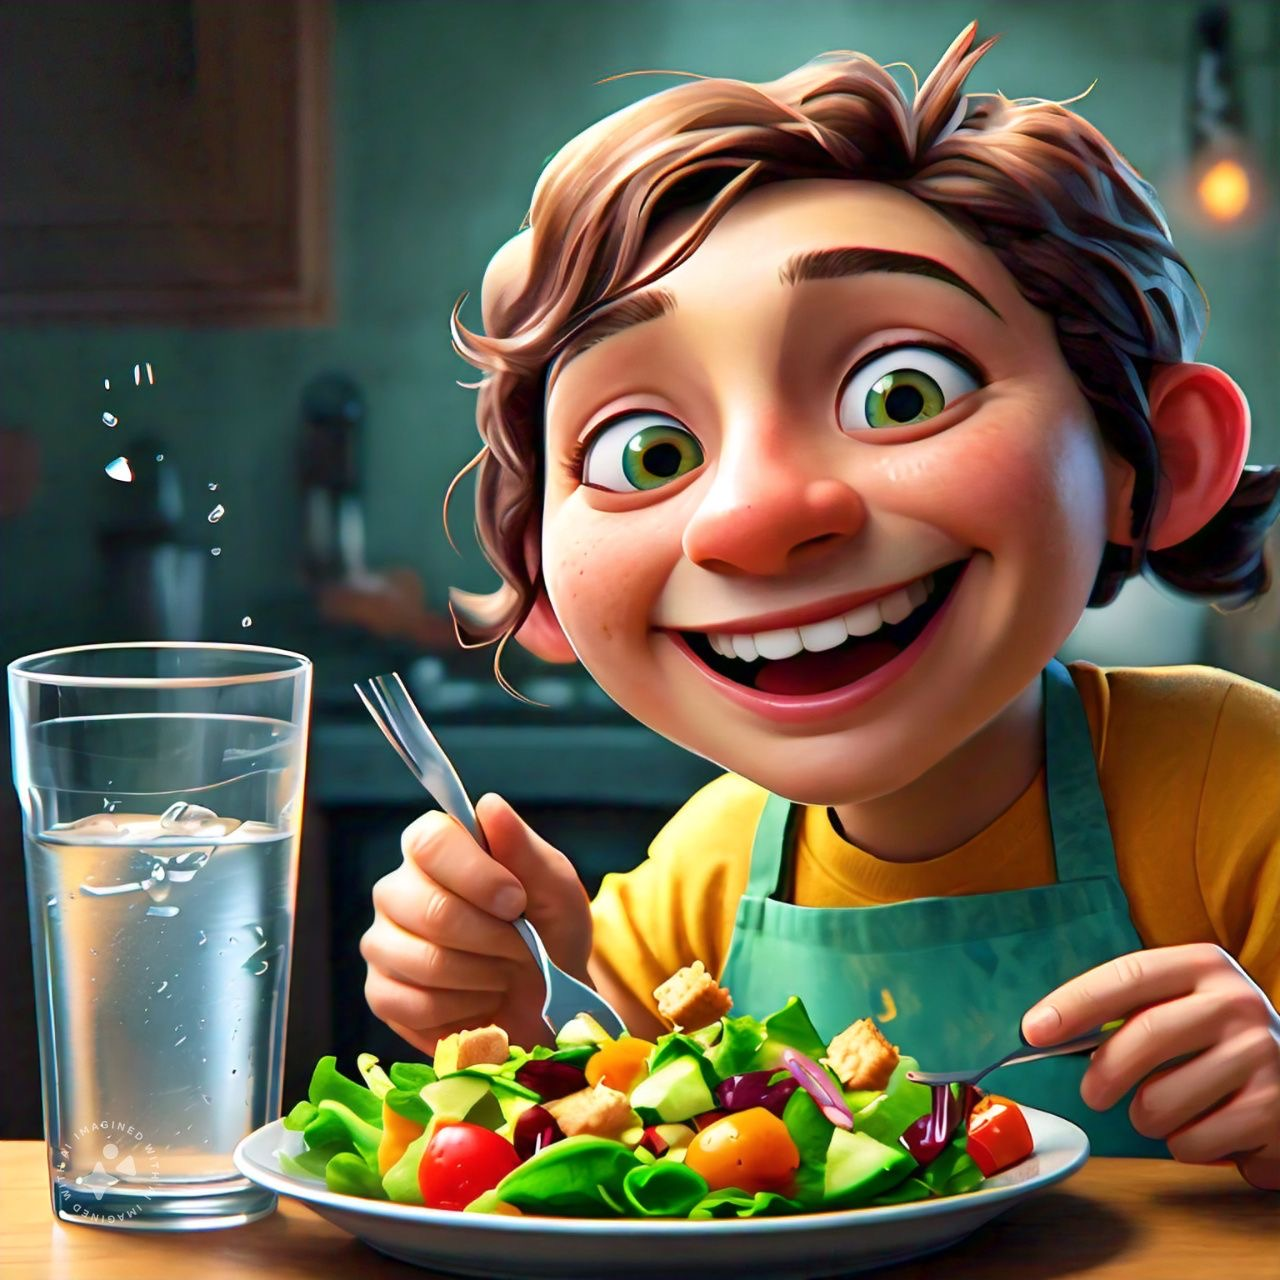

In [38]:
from PIL import Image

image = Image.open('test.jpeg')
image

The first step towards answering questions is encoding the image with the transformer

In [39]:
# Notice how this architecture has a method called encode_image
enc_image = model.encode_image(image)

# We get a tensor as a result
enc_image

tensor([[[-0.2288, -0.4462,  2.2545,  ...,  0.9867,  1.1751,  0.2576],
         [ 0.1211,  1.5380,  1.0619,  ..., -0.1349,  1.1175,  0.5334],
         [-0.2582,  0.1994, -1.1398,  ...,  0.5534,  0.2588,  0.1247],
         ...,
         [-0.2547, -0.3822, -0.1164,  ..., -2.4073, -0.2697,  0.7069],
         [ 2.0905, -0.0480, -2.0838,  ..., -0.7200, -2.2749, -1.3172],
         [-1.5731, -3.3280,  3.5116,  ...,  0.8933, -0.5140,  1.6179]]],
       device='cuda:0')

In [40]:
enc_image.size()

torch.Size([1, 729, 2048])

Now, the second modality, text, is used to present a question

In [41]:
question = "What is the color of the eyes of this individual?"

# Notice how there is another method that takes the question and the tensor that represents the encoded image
# It also requires the tokenizer
model.answer_question(enc_image, question, tokenizer)

'The individual has green eyes.'

In [42]:
question = "What is the boy eating and drinking?"

model.answer_question(enc_image, question, tokenizer)

'The boy is eating a salad and drinking water.'

In [43]:
question = "What is the overall color of this picture?"

model.answer_question(enc_image, question, tokenizer)

'The overall color of the picture is predominantly green, with some blue and yellow accents.'

# Difussion models

Diffusion models go in the opposite direction. You pass as input a prompt, describing the image. This prompt is encoded with a transformer to generate an embedding representation.

The embedding representation is used to generate, or decode, a noisy image.
This image then goes through a _diffusion_ cycle, where each iteration reduces the noise in the image, eventually leading to the result.

In [44]:
# Import the dependencies
from diffusers import DiffusionPipeline
import torch

# Load the model and send it to the GPU
pipe = DiffusionPipeline.from_pretrained("stablediffusionapi/realistic-vision-v51", torch_dtype=torch.float16)
pipe.to("cuda")


model_index.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/379 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/606 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/692 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.30.1",
  "_name_or_path": "stablediffusionapi/realistic-vision-v51",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]

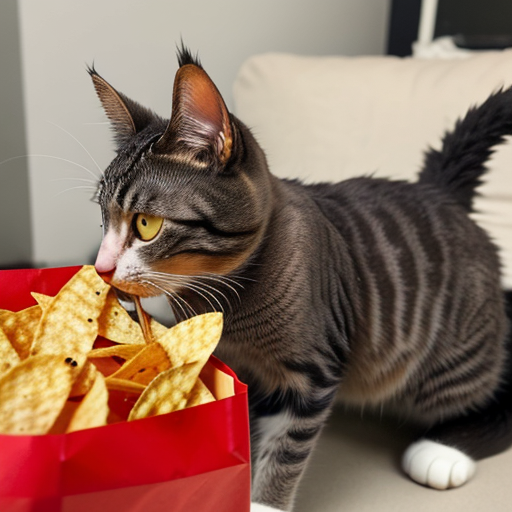

In [46]:

# run image variation
image = pipe("a cat eating a bag of chips").images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

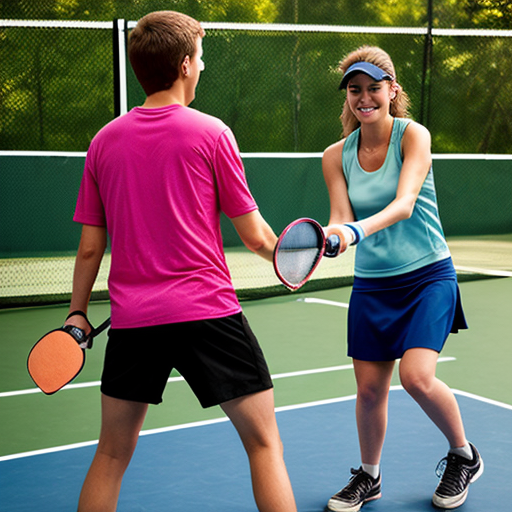

In [47]:
image = pipe("A young couple playing pickleball").images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

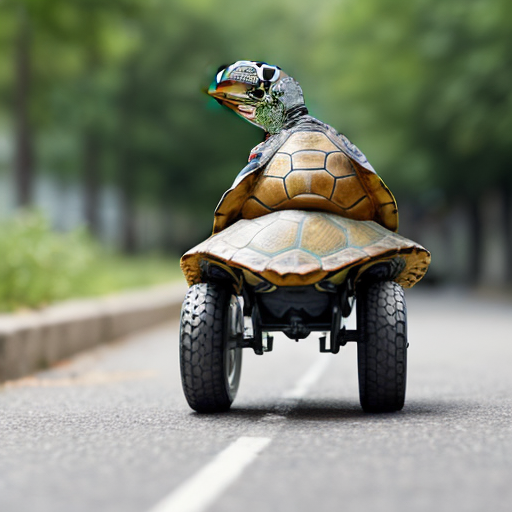

In [48]:
# run image variation
image = pipe("a turtle riding a bicycle").images[0]
image

# Automatic speech recognition

Takes as input a sound file with speech. Any conversation will be transcribed into text

In [50]:
# Load a sample file with multiple phrases

from IPython.display import Audio, display
display(Audio('harvard.wav', autoplay=True))

In [51]:
import torch
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline
from datasets import load_dataset


device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

model_id = "openai/whisper-large-v3"

model = AutoModelForSpeechSeq2Seq.from_pretrained(
    model_id, torch_dtype=torch_dtype, low_cpu_mem_usage=True, use_safetensors=True
)
model.to(device)

processor = AutoProcessor.from_pretrained(model_id)

pipe = pipeline(
    "automatic-speech-recognition",
    model=model,
    tokenizer=processor.tokenizer,
    feature_extractor=processor.feature_extractor,
    torch_dtype=torch_dtype,
    device=device,
)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [53]:
result = pipe('harvard.wav')
print(result["text"])

 The stale smell of old beer lingers. It takes heat to bring out the odor. A cold dip restores health and zest. A salt pickle tastes fine with ham. Tacos al pastor are my favorite. A zestful food is the hot cross bun.


In [54]:
display(Audio('twister.wav', autoplay=True))

In [55]:
result = pipe('twister.wav')
print(result["text"])

 Peter Piver picked a peck of pickled peppers. A peck of pickled peppers Peter Piver picked.


# Text to Speech

TTS goes in the oposite direction. It takes a prompt and potentially other parameters, such as a voice sample, or the target language, then generates a sound file uttering the input prompt.

In [57]:
# We are using Coqui, not HuggingFace here
import torch
from pprint import pprint
from TTS.api import TTS

# Get device
device = "cuda" if torch.cuda.is_available() else "cpu"

# List available 🐸TTS models
pprint(TTS().list_models())


No API token found for 🐸Coqui Studio voices - https://coqui.ai 
Visit 🔗https://app.coqui.ai/account to get one.
Set it as an environment variable `export COQUI_STUDIO_TOKEN=<token>`

['tts_models/multilingual/multi-dataset/your_tts',
 'tts_models/bg/cv/vits',
 'tts_models/cs/cv/vits',
 'tts_models/da/cv/vits',
 'tts_models/et/cv/vits',
 'tts_models/ga/cv/vits',
 'tts_models/en/ek1/tacotron2',
 'tts_models/en/ljspeech/tacotron2-DDC',
 'tts_models/en/ljspeech/tacotron2-DDC_ph',
 'tts_models/en/ljspeech/glow-tts',
 'tts_models/en/ljspeech/speedy-speech',
 'tts_models/en/ljspeech/tacotron2-DCA',
 'tts_models/en/ljspeech/vits',
 'tts_models/en/ljspeech/vits--neon',
 'tts_models/en/ljspeech/fast_pitch',
 'tts_models/en/ljspeech/overflow',
 'tts_models/en/ljspeech/neural_hmm',
 'tts_models/en/vctk/vits',
 'tts_models/en/vctk/fast_pitch',
 'tts_models/en/sam/tacotron-DDC',
 'tts_models/en/blizzard2013/capacitron-t2-c50',
 'tts_models/en/blizzard2013/capacitron-t2-c150_v2',
 'tts_models/en/mult

In [58]:
# Instantiate a model. Let's use a bilingual
tts = TTS("tts_models/multilingual/multi-dataset/your_tts")

 > tts_models/multilingual/multi-dataset/your_tts is already downloaded.
 > Using model: vits
 > Setting up Audio Processor...
 | > sample_rate:16000
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024
 > Model fully restored. 
 > Setting up Audio Processor...
 | > sample_rate:16000
 | > resample:False
 | > num_mels:64
 | > log_func:np.log10
 | > min_level_db:-

In [60]:
tts.tts_to_file("This is voice cloning.", speaker_wav="sample.m4a", language="en", file_path="output.wav")

display(Audio('output.wav', autoplay=True))

 > Text splitted to sentences.
['This is voice cloning.']
 > Processing time: 3.469866991043091
 > Real-time factor: 2.104224979407575


In [61]:
tts.tts_to_file("C'est le clonage de la voix.", speaker_wav="sample.m4a", language="fr-fr", file_path="output.wav")

display(Audio('output.wav', autoplay=True))

 > Text splitted to sentences.
["C'est le clonage de la voix."]
 > Processing time: 3.385075569152832
 > Real-time factor: 2.0729182909692785


In [62]:
tts.tts_to_file("Isso é clonagem de voz.", speaker_wav="sample.m4a", language="pt-br", file_path="output.wav")

display(Audio('output.wav', autoplay=True))

 > Text splitted to sentences.
['Isso é clonagem de voz.']
 > Processing time: 5.41633152961731
 > Real-time factor: 2.0760182175612534


In [63]:
tts = TTS('tts_models/es/mai/tacotron2-DDC') # This is a model for a female spanish voice

# Generate some speech
tts.tts_to_file("Si seis sables son seis sables, ¿por qué seis sabios no son seis sabios?", file_path="output.wav")

display(Audio('output.wav', autoplay=True))

 > tts_models/es/mai/tacotron2-DDC is already downloaded.
 > vocoder_models/universal/libri-tts/fullband-melgan is already downloaded.
 > Using model: Tacotron2
 > Setting up Audio Processor...
 | > sample_rate:16000
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:True
 | > symmetric_norm:True
 | > mel_fmin:50.0
 | > mel_fmax:7600.0
 | > pitch_fmin:0.0
 | > pitch_fmax:640.0
 | > spec_gain:1.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:True
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:/root/.local/share/tts/tts_models--es--mai--tacotron2-DDC/scale_stats.npy
 | > base:10
 | > hop_length:256
 | > win_length:1024
 > Model's reduction rat